In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [3]:
train_df=pd.read_csv('../data/preprocessed/train.csv')
test_df=pd.read_csv('../data/preprocessed/test.csv')

In [4]:
X_train = train_df.drop(["id","rainfall"], axis=1)
y_train = train_df["rainfall"]
X_test = test_df.drop("id",axis=1).copy()

In [5]:
model=SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [6]:
y_pred = model.predict(X_test)
submission = pd.DataFrame({
        "id": test_df["id"],
        "rainfall": y_pred
    })
submission.to_csv('../data/submissons/sgd_classifier_submission.csv', index=False)
print("Submission saved")

Submission saved


In [7]:
# saving the model
import pickle
pickle.dump(model, open("../models/sgdclassifier_model.pkl", "wb"))
print("Model saved")

Model saved


In [8]:
#model performance mesuure on training data
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score

In [9]:
# Convert continuous target feature to binary integer feature
y_train= (y_train >= 0.5).astype(int)

In [10]:
pred=cross_val_predict(model, X_train, y_train, cv=3) 
y_pred_train = (pred >= 0.5).astype(int)

In [11]:
cm=confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix: ", cm)


Confusion Matrix:  [[ 306  234]
 [ 121 1529]]


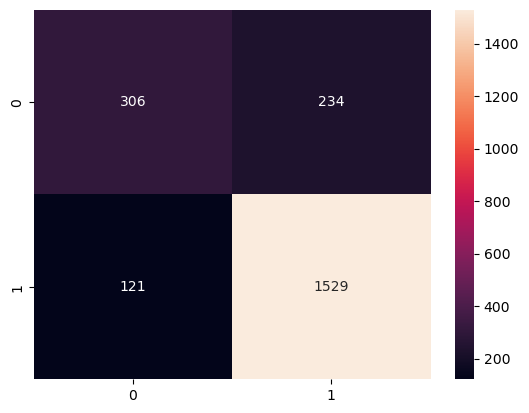

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [13]:
print("Precision: ", precision_score(y_train, y_pred_train))
print("Recall: ", recall_score(y_train, y_pred_train))
print("F1 Score: ", f1_score(y_train, y_pred_train))
print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_train))

Precision:  0.8672716959727736
Recall:  0.9266666666666666
F1 Score:  0.8959859361265748
ROC AUC Score:  0.7466666666666666


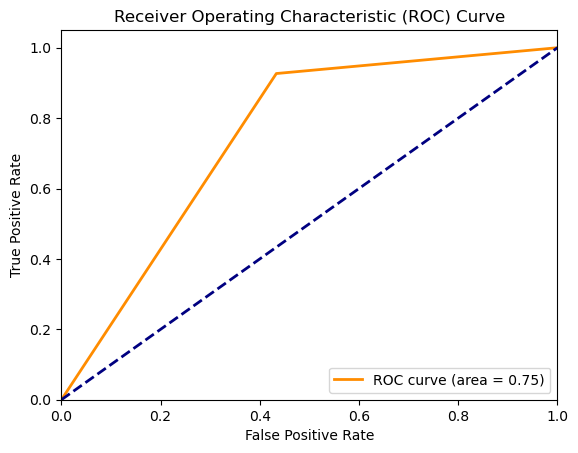

In [14]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_train, y_pred_train)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

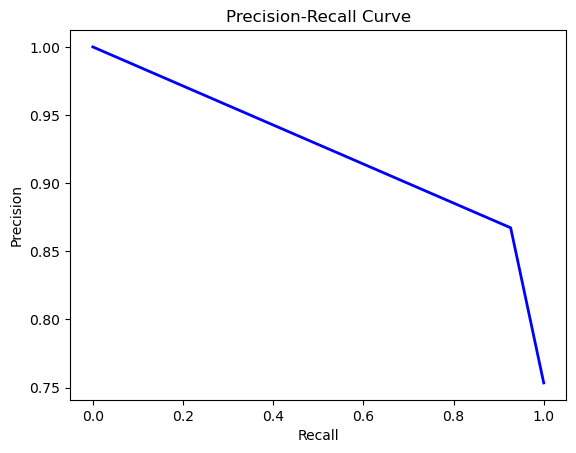

In [15]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_train, pred)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()